# Tarrasque-Tiamat: Trabalho final de Redes Neurais (RN) e Algoritmos Genéticos (AG)
## Joana de Medeiros Oliveira Hulse Molinete e Rafaela Beatriz Silva Luz

## Introdução

No presente trabalho, combinamos o uso de Redes Neurais (RN) do tipo **Multilayer Perceptron (MLP)** e de **Algoritmos Genéticos (AG)** para prever a temperatura de *melting* (Tm) de proteínas a partir de suas sequências de aminoácidos e gerar novas sequências de aminoácidos otimizadas para maior estabilidade térmica, por meio da evolução dirigida via algoritmos genéticos.
 
A temperatura de *melting* é definida como o ponto no qual 50% das moléculas de uma proteína perdem sua estrutura nativa (desnaturam), o que a torna um importante indicador de estabilidade térmica [[3]](https://www.nature.com/articles/s41598-025-98667-9). Essa propriedade é crucial em diversas aplicações de biotecnologia e bioengenharia, como no desenvolvimento de enzimas industriais que operam em altas temperaturas, projeções de proteínas que possuem maior resistência à degradação, estudos de variantes proteicas menos suscetíveis à desnaturação para aplicação em farmacologia e medicina, etc. Tradicionalmente, determinar a *Tm* de uma proteína exige experimentação laboratorial, o que torna o processo custoso e demorado, especialmente com grandes bancos de dados de proteínas ou no projeto de novas sequências.
 
Nesse contexto, propomos uma abordagem baseada em aprendizado de máquina para prever a *Tm* de proteínas diretamente de sua sequência de aminoácidos. Para isso, codificamos as sequências utilizando embeddings de linguagem baseados em modelos pré-treinados (ProtBERT), e treinamos uma rede MLP otimizada com Optuna para resolver esse problema de regressão. Com os dados de saída da rede, construímos um algoritmo genético, cujo objetivo é evoluir novas sequências de aminoácidos que maximizem a *Tm* predita pelo modelo. Assim, o AG atua como um mecanismo de busca no espaço de sequências, guiado pela predição da MLP como função de fitness.
 
Este *notebook* apresenta todas as etapas do processo, incluindo:
 
- Pré-processamento dos dados e codificação das sequências;
- Construção e otimização da arquitetura da MLP (utilizando **Optuna** para ajuste de hiperparâmetros);
- Implementação e execução do algoritmo genético para geração de novas sequências de aminoácidos;
- Avaliação do desempenho do modelo e análise dos melhores indivíduos (*hall da fama*);
- Discussão dos resultados.
 
Esperamos demonstrar que essa combinação de modelos preditivos e algoritmos evolutivos é uma poderosa ferramenta para acelerar a descoberta de biomoléculas com propriedades desejadas.

### Proposta

Devido ao interesse na área, os estudantes buscaram por um problema em Design de Proteínas. Em conversa com o professor Daniel Roberto Cassar, o mesmo aconselhou o uso de MLP como função objetivo de AG como uma estratégia para realizar ambos os trabalhos finais (Tarrasque e Tiamat) de forma conjunta. Após pesquisas na internet que geraram *insights* — como tentar fazer uma evolução dirigida de sequências de aminoácidos, buscando otimizar alguma característica quantificável —, mas não uma ideia concreta e realizável de um problema a ser proposto, o professor Leandro Nascimento Lemos, pesquisador na área de bioinformática, foi procurado e recomendou que os estudantes consultassem o pesquisador Helder Veras Ribeiro Filho, que estuda design de proteínas com aplicação de *Machine Learning* (ML) no LNBio. Ao apresentarmos enunciado, ideias e tempo de trabalho, Helder sugeriu o uso do Protbert para representar sequências de aminoácidos para uma função objetivo em Rede Neural (RN) que predissesse as temperaturas de *melting* (TM) e que essa RN fosse usada como função objetivo de uma evolução dirigida (Algoritmos Genéticos - AG) de sequências de aminoácidos. Agradecemos profundamente aos envolvidos no desenvolvimento da proposta e objetivos deste trabalho.

### Objetivo

Realizar a evolução dirigida (Algoritmos Genéticos - AG) de sequências de aminoácidos (atributos) de proteínas objetivando maiores valores do indicador de estabilidade temperatura de *melting* previstos por uma função objetivo em Redes Neurais (RN) do tipo *perceptron* multicamadas (MLP). 

#### Objetivos específicos

1. Obter atributos legíveis para a MLP e que representem as sequências de aminoácidos das proteínas. Isso será feito a partir da obtenção de embeddings médios - representantes das sequências de aminoácidos de treino, teste e validação - através de um modelo pré-treinado em sequências de proteínas usando um objetivo de modelagem de linguagem mascarada (MLM) do ProtTrans [[1]](https://doi.org/10.1101/2020.07.12.199554).

2. Otimizar hiperparâmetros com Optuna [[2]](https://optuna.org/) e treinar uma MLP para regressão do *target* temperatura de *melting* a partir dos atributos mencionados no objetivo 1 (representações das sequências de aminoácidos de proteínas/peptídeos do ProtTrans [[1]](https://doi.org/10.1101/2020.07.12.199554)). Os datasets usados serão os presentes neste [link](https://webs.iiitd.edu.in/raghava/pptstab/data.html), correspondentes ao artigo [[3]](https://www.nature.com/articles/s41598-025-98667-9).

3. Realizar uma evolução dirigida (AG) a partir de sequências do dataset não expostas à MLP visando obter sequências com maiores temperaturas de *melting* previstas pela MLP, que será a função de objetivo para maximização no AG.  

### *Datasets*

Os *datasets* usados foram disponibilizados no [link](https://webs.iiitd.edu.in/raghava/pptstab/data.html) como dados usados para o trabalho [[3]](https://www.nature.com/articles/s41598-025-98667-9): "Previsão e projeto de proteínas termoestáveis com uma temperatura de *melting* desejada", em tradução livre. Uma característica relevante desses conjuntos de dados é que os autores evitaram a redundância nas sequências de aminoácidos utilizadas para uma maior robustez da sua previsão de temperatura de *melting*, sendo que nenhuma sequência apresenta mais que 40% de semelhança com outra dos *datasets*. 

Neste trabalho, pretendeu-se usar o *dataset* de treino do artigo [[3]](https://www.nature.com/articles/s41598-025-98667-9) para treino da MLP para predição de temperatura de *melting* e o *dataset* de validação do *paper* para validação e teste (com *split* de metade dos dados para cada tipo, evitando o vazamento de dados) da MLP. No entanto, devido à limitação de tempo de uso do HPC e de entrega do trabalho, optou-se finalmente por usar primeiras poucas centenas do *dataset* de treino da fonte para todo o trabalho, realizando o devido *split* e tratamento de treino, validação e teste.

Para a evolução dirigida, geraremos sequências de aminoácidos aleatórias de tamanho variável como população inicial para evolução. Reconhecemos que esse método não necessariamente produz sequências válidas para proteínas, ou seja, peptídeos suficientemente estáveis que se enovelem, mas o cruzamento entre sequências de proteínas existentes com pontos de partição do *crossover* aleatórios também não o fariam e, por ora, consideramos que, para o nível deste trabalho e pelo aprendizado ainda assim obtido, essa é uma condição razoável. Isso não retira a possibilidade de atualização futura do mesmo, tornando-o mais aplicável.

### Representação de sequência de aminoácidos por *embedding* médio do ProtTrans

ProtTrans [[1]](https://doi.org/10.1101/2020.07.12.199554) testou vários Modelos de Linguagem (ML) extraídos de Processamento de Linguagem Natural (NLP) para representar sequências de aminoácidos de proteínas ([GitHub](https://github.com/agemagician/ProtTrans)). Entre eles, ProtT5, que apresentou melhor desempenho em [[1]](https://doi.org/10.1101/2020.07.12.199554); e [ProtBert](https://huggingface.co/Rostlab/prot_bert), que integrou o modelo de melhor desempenho para previsão de temperatura de *melting* em [[3]](https://www.nature.com/articles/s41598-025-98667-9), fonte do nosso dataset, e recomendado pelo pesquisador Helder Filho, consultado durante a procura pelo tema do trabalho. A redução da dimensionalidade revelou que os *embeddings* de LM de proteínas, obtidos a partir de dados não rotulados, capturaram algumas características biofísicas de sequências de proteínas. O trabalho também validou a vantagem de usar esses *embeddings* como entrada exclusiva para várias tarefas subsequentes.

O *embedding* médio da última camada (`last_hidden_state`) de um LM usado pelo ProtTrans é uma representação vetorial de tamanho fixo predita para uma sequência de aminoácidos. No presente trabalho, usaremos os *embeddings* médios do ProtBert para representar as sequências de aminoácidos das proteínas/peptídeos para predição do *target* por MLP.

### MLP para predição da temperatura de *melting* a partir da representação de sequência do ProtTrans
 
O vetor fixo que resume a informação da proteína foi utilizado como entrada para a rede neural. A MLP foi construída de forma flexível, com arquitetura ajustável via otimização de hiperparâmetros. Os principais componentes do modelo incluem:
 
- **Camadas totalmente conectadas (linear layers)**: variando de 1 a 3 camadas ocultas.
- **Número de neurônios por camada**: entre 8 e 64.
- **Funções de ativação**: ReLU, Tanh e Sigmoid.
- **Função de perda**: erro quadrático médio (MSELoss), consideramos a mais adequada para o problema de regressão.
- **Otimizadores testados**: Adam, SGD e RMSprop.
- **Taxa de aprendizado**: entre 1e-5 e 1e_2, ajustada com a montagem da rede.
 
A função (`cria_rede_final()`) gera a arquitetura dinamicamente com base nos hiperparâmetros fornecidos.
 
O modelo foi treinado com **dados normalizados** por normalização de máximo absoluto. Mesmo que os dados já viessem normalizados do dataset, foi necessário normalizá-los novamente porque houve uma mudança distoante do espaço de busca (de ~30.000 sequências para 1000 utilizadas). Optamos por realizar a validação em um conjunto separado de dados para avaliar o desempenho. 
Para garantir robustez ao modelo implementamos treinamento amostral, parada antecipada (early stopping) e salvamento e carregamento dos melhores pesos obtidos durante o treinamento.
 
Os dados de treino, validação e teste foram convertidos para tensores do PyTorch e tratados como tensores float32.
 
Utilizamos a biblioteca [**Optuna**](https://optuna.org/) [[4]](https://github.com/optuna/optuna-examples/blob/main/pytorch/pytorch_simple.py) para encontrar os melhores hiperparâmetros de forma automatizada. O objetivo da otimização era **minimizar o erro quadrático médio (MSE)** sobre o conjunto de validação. Mais de 100 arquiteturas diferentes foram testadas, variando o número de camadas e neurônios, tipo de ativação, otimizador e taxa de aprendizado.
 
O desempenho da rede foi avaliado com base na **raiz quadrada do erro quadrático médio (RMSE)**. As curvas de treinamento e validação foram registradas a cada época, possibilitando uma análise clara da convergência e da generalização do modelo.
 
### Evolução dirigida em AG de sequências de aminoácidos visando a maior temperatura de *melting* predita pela MLP
 
Após treinar uma rede neural MLP capaz de prever a temperatura de *melting* de proteínas com base em representações vetoriais derivadas do modelo ProtTrans, aplicamos um algoritmo genético para simular uma **evolução dirigida *in silico***. O objetivo foi gerar novas sequências de aminoácidos que maximizassem a temperatura *Tm* predita. A inspiração para trabalhar com evolução dirigida veio de fontes como [[7]](https://doi.org/10.1093/protein/gzg077) e [[4]](https://doi.org/10.1016/j.jtbi.2008.11.005).
 
Nesse processo, cada indivíduo da população representa uma sequência de proteína/peptídeo, composta por cadeias de aminoácidos sorteados entre os 20 presentes na natureza. A população inicial foi criada aleatoriamente, e a cada geração os indivíduos passam por cruzamento e mutação. A estratégia de cruzamento utilizada foi a **two-point crossover** (cruzamento com dois pontos de troca), e a mutação implementada foi a **indel** (inserção-deleção de genes), que consiste na substituição aleatória de um aminoácido por outro ou deleção do aminoácido da sequência original, com probabilidade ajustável.
 
A avaliação do fitness foi feita de maneira indireta: cada sequência é primeiro convertida em um `embedding` utilizando o modelo ProtBert, e esse vetor é então passado pela MLP treinada para obter uma previsão da temperatura de *melting*. Assim, o AG é guiado não por uma fórmula explícita, mas pelo conhecimento aprendido pela rede neural a partir de dados reais.
 
Estatísticas como média, desvio padrão e valor máximo do fitness por geração foram coletadas para monitorar o desempenho do algoritmo ao longo do tempo, e os indivíduos de melhor fitness foram armazenados em um "hall da fama" para análise.

## Desenvolvimento


#### Bibliotecas e constantes

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

from transformers import BertModel, BertTokenizer
import re

import optuna

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

from deap import base
from deap import tools
from deap import creator
from deap.algorithms import eaSimple

In [2]:
GENES_GA = "sequence"
ATRIBUTOS = [f"{i}" for i in range(1, 1025)]
TARGET = "tm"

### Conversão das sequências de aminoácidos para vetores (atributos para MLP) com ProtBert 

Primeiro, carregamos o tokenizador e o modelo do ProtBert.

In [3]:
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

Criamos o *dataframe* a partir do *dataset* utilizado. `embeddings` é uma lista que recebe os vetores (*embeddings* médios) que representam cada sequência de aminoácidos. A coluna de atributos para a MLP receberá esses *embeddings*, sendo que cada linha receberá o *embedding* de 1024 elementos previsto pelo ProtBert para representar sua sequência de aminoácidos. Cada um dos 1024 elementos serão normalizados por normalização de máximo absoluto para depois servirem para o treino da RN. A parte de tratamento de *dataframe* com Pandas foi otimizada com ajuda do [ChatGPT](https://chatgpt.com/share/6848bba6-4734-8005-a63b-6835f6c401db).

In [4]:
def representacao_protbert(individuo):
    """Recebe uma lista de aminoácidos (indivíduo) e retorna o embedding médio
    da sequência processada pelo ProtBert.

    Args:
      individuo: lista de aminoácidos
    """    
    
    # Substitui aminoácidos não padronizados
    seq = re.sub(r"[UZOB]", "X", individuo)
    # Realiza tokenização
    encoded = tokenizer(seq, return_tensors="pt")
    with torch.no_grad():
        output = model(**encoded)
    # Obtém os embeddings da última camada fazendo a média dos tokens válidos
    emb = output.last_hidden_state.squeeze(0)[1:-1]
    avg_emb = emb.mean(dim=0).numpy()
    
    return avg_emb

De acordo com a descrição de normalização no paper de fonte do *dataset* [[3]](https://www.nature.com/articles/s41598-025-98667-9) e com o intervalo observado abaixo para as temperaturas de *melting*, é possível concluir que as mesmas estão normalizadas por uma normalização de mínimo e máximo que mantém os dados no intervalo [0, 1]. Tendo isso em vista, não nos preocuparemos com a unidade do *target* aqui, fazendo uma nova normalização dependente dos dados de treino que vamos adotar.

In [5]:
df_completo = pd.read_csv('training_dataset.csv').dropna()
print(min(df_completo[TARGET]), max(df_completo[TARGET]))

0.0 1.0


Abaixo, definimos o *dataframe* com que trabalharemos.

In [6]:
df = pd.read_csv('training_dataset.csv').dropna().head(1000)

df[GENES_GA] = df[GENES_GA].str.replace(r"(.)", r"\1 ", regex=True).str.strip()
embeddings = []
for i in df[GENES_GA]:
    embeddings.append(representacao_protbert(i))

df_emb = pd.DataFrame(embeddings, columns=ATRIBUTOS, index=df.index)
df = pd.concat([df, df_emb], axis=1)  
df = df.copy()  # defragmenta a memória (garante que as colunas estejam compactas em um bloco)

df = df.reindex([GENES_GA, *ATRIBUTOS, TARGET], axis=1)

### Dados de treino, teste e validação para a MLP
Começamos definindo as constantes para separação de dados de treino, teste e validação para a RN.

In [7]:
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.1

SEMENTE_ALEATORIA = 61455

Agora, obtemos os x (atributos) e y (*targets*) de treino, teste e validação. Os targets serão normalizados por normalização de máximo absoluto ajustada aos dados de treino antes de alimentarem a RN.

In [8]:
indices = df.index
indices_treino_val, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_val = df.loc[indices_treino_val]
df_teste = df.loc[indices_teste]

X_teste = df_teste.reindex([*ATRIBUTOS], axis=1).values 
y_teste = df_teste.reindex([TARGET], axis=1).values 

In [9]:
indices = df_treino_val.index
indices_treino, indices_val = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_val = df.loc[indices_val]

X_treino = df_treino.reindex([*ATRIBUTOS], axis=1).values
y_treino = df_treino.reindex([TARGET], axis=1).values

X_val = df_val.reindex([*ATRIBUTOS], axis=1).values 
y_val = df_val.reindex([TARGET], axis=1).values

In [10]:
x_scaler = MaxAbsScaler()
x_scaler.fit(X_treino)

y_scaler = MaxAbsScaler()
y_scaler.fit(y_treino)

X_treino = x_scaler.transform(X_treino)
y_treino = y_scaler.transform(y_treino)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_teste = x_scaler.transform(X_teste)
y_teste = y_scaler.transform(y_teste)

Os dados de treino, validação e teste serão convertidos para tensores em formato aceito pelo pytorch.

In [11]:
X_treino = np.array(X_treino.tolist(), dtype=np.float32)
X_treino = torch.tensor(X_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32).view(-1, 1)

In [12]:
X_val = np.array(X_val.tolist(), dtype=np.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

In [13]:
X_teste = np.array(X_teste.tolist(), dtype=np.float32)
X_teste = torch.tensor(X_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32).view(-1,1)

### Rede neural MLP
#### Constantes

In [14]:
NUM_DADOS_DE_ENTRADA = 1024  
NUM_DADOS_DE_SAIDA = 1  

#### Otimização de hiperparâmetros com Optuna
Primeiramente, criamos a função que cria a instância de modelo a partir do `trial` do Optuna.

In [15]:
def cria_instancia_modelo(trial):
    # sugere hiperparametros
    n_camadas = trial.suggest_int("n_camadas", 1, 3)
    taxa_aprendizado = trial.suggest_float("learning_rate", 1e-4, 1e-1, log = True)
    n_epocas = trial.suggest_int("n_epocas", 50, 100)
    otimizador_nome = trial.suggest_categorical("otimizador", ["Adam", "SGD", "RMSprop"])
    
    # arquitetura da rede
    camadas = []
    neuronios_entrada = NUM_DADOS_DE_ENTRADA
    
    for i in range(n_camadas):
        neuronios_camada = trial.suggest_int(f"n_neuronios{i}", 8, 64)
        ativacao = trial.suggest_categorical(f"ativacao{i}", ['ReLU', 'Sigmoid', 'Tanh'])
        
        camadas.append(nn.Linear(neuronios_entrada, neuronios_camada))
    
        # aplicado a função de ativação
        if ativacao == "ReLU":
            camadas.append(nn.ReLU())
        elif ativacao == "Sigmoid":
            camadas.append(nn.Sigmoid())
        else:
            camadas.append(nn.Tanh())
            
        neuronios_entrada = neuronios_camada
        
    # camada de saída
    camadas.append(nn.Linear(neuronios_entrada, NUM_DADOS_DE_SAIDA))
        
    # definindo o modelo
    model = nn.Sequential(*camadas)
    
    # aplicando otimizador
    if otimizador_nome == "Adam":
        otimizador = torch.optim.Adam(model.parameters(), lr = taxa_aprendizado)
    elif otimizador_nome == "SGD":
        otimizador = torch.optim.SGD(model.parameters(), lr = taxa_aprendizado)
    else:
        otimizador = torch.optim.RMSprop(model.parameters(), lr = taxa_aprendizado)
        
    funcao_perda = nn.MSELoss()
    
    #treinando o modelo
    for epoca in range(n_epocas):
        model.train()
        
        # zero grad
        otimizador.zero_grad()
        
        # forward pass
        y_pred = model(X_treino)
        
        # loss
        loss = funcao_perda(y_pred, y_treino)
        
        # backpropagation
        loss.backward()
        
        # atualiza parametros
        otimizador.step()
        
        trial.report(loss.item(), epoca)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
            
    # testando
    model.eval()
    
    with torch.no_grad():
        pred = model(X_val)
        val_loss = funcao_perda(pred, y_val).item()
        rmse = np.sqrt(val_loss)
           
    return rmse

Criamos o objeto de estudo e realizamos a otimização de hiperparâmetros com o Optuna, salvando como variável os melhores parâmetros para criar a MLP final.

In [16]:
objeto_de_estudo = optuna.create_study(direction = "minimize") # queremos diminuir o RMSE
objeto_de_estudo.optimize(cria_instancia_modelo, n_trials = 150, timeout = 600)

print("Melhor trial:")
print("RMSE:", objeto_de_estudo.best_trial.value)
print("Parâmetros:")

# Armazenando e imprimindo os melhores parâmetros do estudo
best_params = objeto_de_estudo.best_trial.params
for key, value in best_params.items():
    print(f"{key}: {value}")

[I 2025-06-12 19:14:50,170] A new study created in memory with name: no-name-08018a17-5045-43b9-9a60-660ec08d37ec
[I 2025-06-12 19:14:50,235] Trial 0 finished with value: 0.1422696827137516 and parameters: {'n_camadas': 2, 'learning_rate': 0.025248392177399874, 'n_epocas': 63, 'otimizador': 'SGD', 'n_neuronios0': 44, 'ativacao0': 'Tanh', 'n_neuronios1': 32, 'ativacao1': 'ReLU'}. Best is trial 0 with value: 0.1422696827137516.
[I 2025-06-12 19:14:50,305] Trial 1 finished with value: 1.34834422366849 and parameters: {'n_camadas': 1, 'learning_rate': 0.05454224228477528, 'n_epocas': 84, 'otimizador': 'RMSprop', 'n_neuronios0': 36, 'ativacao0': 'ReLU'}. Best is trial 0 with value: 0.1422696827137516.
[I 2025-06-12 19:14:50,390] Trial 2 finished with value: 0.10887238275555235 and parameters: {'n_camadas': 1, 'learning_rate': 0.012868521736765979, 'n_epocas': 94, 'otimizador': 'RMSprop', 'n_neuronios0': 44, 'ativacao0': 'Tanh'}. Best is trial 2 with value: 0.10887238275555235.
[I 2025-06-12

Melhor trial:
RMSE: 0.09833361313296506
Parâmetros:
n_camadas: 2
learning_rate: 0.00042294195625656615
n_epocas: 88
otimizador: RMSprop
n_neuronios0: 14
ativacao0: Tanh
n_neuronios1: 41
ativacao1: ReLU


#### Treinamento, validação e teste da MLP final

Definimos a função para criação da rede neural a partir da *trial* mais bem sucedida do Optuna dinamicamente.

In [17]:
def cria_rede_final(params):
    camadas = []
    neuronios_entrada = NUM_DADOS_DE_ENTRADA

    # camadas
    for i in range(params["n_camadas"]):
        neuronios_camada = params[f"n_neuronios{i}"]
        ativacao = params[f"ativacao{i}"]
        
        camadas.append(nn.Linear(neuronios_entrada, neuronios_camada))
        
        if params.get("use_batch_norm", False):
            camadas.append(nn.BatchNorm1d(neuronios_camada))

        # função de ativação
        if ativacao == "ReLU":
            camadas.append(nn.ReLU())
        elif ativacao == "LeakyReLU":
            camadas.append(nn.LeakyReLU(0.2))
        elif ativacao == "Sigmoid":
            camadas.append(nn.Sigmoid())
        else:
            camadas.append(nn.Tanh())
          
        neuronios_entrada = neuronios_camada

    camadas.append(nn.Linear(neuronios_entrada, NUM_DADOS_DE_SAIDA))
        
    return nn.Sequential(*camadas)

Definimos a função de treinamento do modelo a partir dos parâmetros e otimizador do melhor *trial* da otimização do Optuna.

In [18]:
def treina_modelo(params, X_treino, y_treino, X_teste, y_teste, X_val, y_val):
    # cria modelo
    modelo = cria_rede_final(params)

    # otimizador
    if params["otimizador"] == "Adam":
        otimizador = torch.optim.Adam(modelo.parameters(), lr = params["learning_rate"])
    elif params["otimizador"] == "SGD":
        otimizador = torch.optim.SGD(modelo.parameters(), lr = params["learning_rate"])
    else:
        otimizador = torch.optim.RMSprop(modelo.parameters(), lr = params["learning_rate"])
    
    funcao_perda = nn.MSELoss()
    menor_loss = float("inf")
    max_erros = 20
    sem_progresso = 0
    pesos_melhor_rede = None
    melhor_epoca = 0
    
    historico_treino = []
    historico_val = []
    
    # treino
    for epoca in range(params["n_epocas"]):
        modelo.train()
        loss_treino = 0
        
        for X, y in zip(X_treino, y_treino):
            # zero grad
            otimizador.zero_grad()

            # forward pass
            saida = modelo(X)

            # loss
            loss = funcao_perda(saida, y)

            # backpropagation
            loss.backward()

            # atualiza parametros
            otimizador.step()
            
            loss_treino += loss.item()
            
        loss_treino_medio = loss_treino / len(X_treino)
        historico_treino.append(loss_treino_medio)
        
        # validação
        modelo.eval()
        loss_val = 0
        with torch.no_grad():
            for X_v, y_v in zip(X_val, y_val):
                preds = modelo(X_v)
                loss_val += funcao_perda(preds, y_v).item()

        loss_val /= len(X_val)
        historico_val.append(loss_val)

        # parada forçada 
        if loss_val < menor_loss:
            menor_loss = loss_val
            melhor_epoca = epoca 
            pesos_melhor_rede = modelo.state_dict().copy()
        else:
            sem_progresso += 1
            if sem_progresso >= max_erros:
                print(f"Parada forçada na época {epoca}")
                print(f"Os pesos salvos são da {melhor_epoca}, que obteve menor perda da validação") 
                break
                
    # carrega os melhores pesos
    modelo.load_state_dict(pesos_melhor_rede)
    
    # calcula RMSE final com os dados de teste
    modelo.eval()
    with torch.no_grad():
        preds_teste = modelo(X_teste)
        rmse_final = np.sqrt(funcao_perda(preds_teste, y_teste).item())

    print(f"RMSE de teste: {rmse_final:.4f}")
    return modelo, rmse_final, historico_treino, historico_val, melhor_epoca 

Treinamos a MLP final que servirá de função objetivo da evolução dirigida.

In [19]:
rede_final, RMSE, hist_treino, hist_validacao, melhor_epoca = treina_modelo(best_params, X_treino, y_treino, X_teste, y_teste, X_val, y_val)

Parada forçada na época 23
Os pesos salvos são da 5, que obteve menor perda da validação
RMSE de teste: 0.1018


Considerando valores que variam entre 0 e 1 (temperatura de *melting* normalizada) e a exposição a poucos dados, o RMSE apresenta um erro moderado, de cerca de um décimo do intervalo de treino. A parada, no entanto, ocorreu no início do treinamento, provavelmente porque os dados de treino e validação são muito distantes entre si, o que faz sentido dado o largo espaço de busca de sequências de aminoácidos a baixa amostragem. Além disso, a alta dimensionalidade do problema, que apresenta 1024 atributos, aumenta muito sua complexidade para resolução.

/home/rafaela24021/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rafaela24021/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rafaela24021/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rafaela24021/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

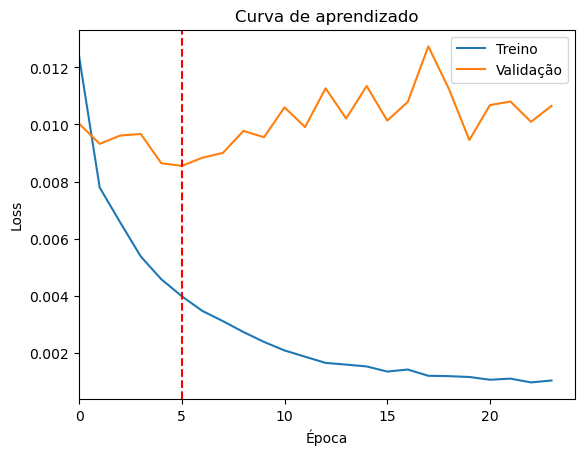

In [21]:
sns.lineplot(hist_treino, label="Treino")
eixo = sns.lineplot(hist_validacao, label="Validação")

eixo.set_xlim(left=0)

eixo.axvline(x=melhor_epoca, color='red', linestyle='--', label=f"Melhor época ({melhor_epoca})") 

eixo.set_title("Curva de aprendizado")
eixo.set_xlabel("Época")
eixo.set_ylabel("Loss");

Observa-se que, após a época cujos pesos foram salvos, não houve época com melhor (menor) perda da validação, o que justifica o *early stopping* usado. Provavelmente, a parada antecipada ocorreu após poucas épocas devido à baixa amostragem dos dados, que impossibilitou uma predição mais generalista seguindo os dados de treino.

### Evolução Digirida (AG)

#### Constantes
Algumas das constantes foram definidas com base no considerado em [[4]](https://doi.org/10.1016/j.jtbi.2008.11.005): raramente as evoluções direcionadas *in silico* são conduzidas por mais de 10 gerações, mas isso pode estar associado ao alto custo computacional em abordagens mais complicadas que envolvam predição da estrutura da proteína, o que não vem ao caso aqui; a chance de cruzamento usada foi de 0.6; como aqui será adotada uma estratégia diferente de mutação, consideramos uma chance de mutação arbitrária não usada no artigo.

In [30]:
NUM_MIN_AMINOACIDOS = 100
NUM_MAX_AMINOACIDOS = 500 

TAMANHO_POPULACAO = 200
NUM_GERACOES = 100
CHANCE_DE_CRUZAMENTO = 0.6
CHANCE_DE_MUTACAO = 0.1 
TAMANHO_TORNEIO = 4
TAMANHO_HALL_DA_FAMA = 3
TAMANHO_MAXIMO_INDEL = 15

Define-se também a lista dos aminoácidos canônicos representados pelas strings de seus símbolos de uma letra. Não usaremos aminoácidos raros, uma vez que são raros e sua representação no Protbert é subvalorizada, pois ele converte todos aminoácidos raros para uma representação única antes de obter a representação em vetor.

In [23]:
aminoacidos = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']

Este problema se assemelha ao problema das caixas não binárias e, por isso, nos basearemos nos materiais de aula do professor Daniel Cassar [5] sobre aplicação do módulo DEAP [[6]](https://doi.org/10.1016/j.jtbi.2008.11.005) a esse problema, fazendo as adaptações necessárias no código do professor para resolver nosso caso.

Primeiro, definimos uma função para criar genes como códigos de uma letra de aminoácidos.

In [24]:
def gene_cnb_aminoacidos(valores_possiveis):
    """Sorteia um valor para uma caixa no problema das caixas não-binárias de sequência de aminoácidos

    Args:
      valores_possiveis: lista de strings dos símbolos de uma letra dos aminoácidos aceitos.
    """
    gene = rd.choice(valores_possiveis)
    return gene

Depois, definimos uma função que gera indivíduos de tamanho variável a partir da função de geração de genes a ser colocada na caixa de ferramentas do DEAP. Isto é feito porque o initRepeat do DEAP exige um tamanho fixo para o indivíduo e, como queremos possibilitar a utilização de sequências de tamanhos distintos como indivíduos, a criação de uma função própria de criação de indivíduos é uma adaptação possível. O [ChatGPT](https://chatgpt.com/share/68482e07-85f0-8005-b1e7-0282e00ce71e) foi usado como fonte da base desse código.

In [25]:
def cria_individuo_tamanho_variavel(min_genes, max_genes):
    """Cria um indivíduo de tamanho aleatório em um intervalo a partir da função cria_gene da toolbox do DEAP.

    Args:
      min_genes: inteiro que representa o número mínimo de genes.
      max_genes: inteiro que representa o número máximo de genes.
    """
    tamanho = rd.randint(NUM_MIN_AMINOACIDOS, NUM_MAX_AMINOACIDOS)
    return creator.Individuo([toolbox.cria_gene() for _ in range(tamanho)])

Coloca-se a função objetivo do problema definida no material de aula.

In [26]:
def funcao_objetivo(individuo):
    """Computa a função objetivo de MLP para previsão de temperatura
    de melting a partir da representação da sequência de aminoácidos 
    do Protbert no problema das caixas não-binárias de aminoácidos.

    Args:
      individuo: lista contendo os genes (aminoácidos) das caixas não-binárias
    """
    seq = " ".join(individuo)
    vetor_individuo = representacao_protbert(seq)
    vetor_individuo = torch.tensor(vetor_individuo, dtype=torch.float32).unsqueeze(0)
    rede_final.eval()
    with torch.no_grad():
        tm_predita = rede_final(vetor_individuo)
    tm_predita = tm_predita.numpy() 
    return (tm_predita, )

Coloca-se a função de mutação de inserção e deleção que servirá ao problema de mutação dos símbolos dos aminoácidos e não está disponível no DEAP. Limitaremos um tamanho mínimo para a deleção na sequência para não ficarmos com sequências muito pequenas.

In [27]:
def mutacao_indel(individuo, max_indel_size, aminoacidos_permitidos = aminoacidos, min_genes = 100):
    max_deletavel = len(individuo) - min_genes

    if rd.random() < 0.5 and max_deletavel > 0:  #deleção
        tamanho = rd.randint(1, min(max_indel_size, max_deletavel))  
        posicao = rd.randint(0, len(individuo) - tamanho)
        del individuo[posicao:posicao + tamanho]

    else: # inserção
        tamanho = rd.randint(1, max_indel_size)
        posicao = rd.randint(0, len(individuo))
        individuo[posicao:posicao] = [rd.choice(aminoacidos_permitidos) for i in range(tamanho)]
        
    return (individuo, )

Criamos o algoritmo genético com DEAP e aplicamos as funções acima, além de um cruzamento de ponto duplo e da seleção por torneio com funções próprias do DEAP.

In [31]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("cria_gene", gene_cnb_aminoacidos, aminoacidos)

toolbox.register("cria_individuo", cria_individuo_tamanho_variavel, NUM_MIN_AMINOACIDOS, NUM_MAX_AMINOACIDOS)

toolbox.register(
    "populacao", tools.initRepeat, list, toolbox.cria_individuo, TAMANHO_POPULACAO
)

toolbox.register("evaluate", funcao_objetivo)

toolbox.register(
    "select", tools.selTournament, tournsize=TAMANHO_TORNEIO
)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register(
    "mutate",
    mutacao_indel,
    max_indel_size=TAMANHO_MAXIMO_INDEL,
    aminoacidos_permitidos=aminoacidos,
    min_genes = NUM_MIN_AMINOACIDOS,
)

hall_da_fama = tools.HallOfFame(TAMANHO_HALL_DA_FAMA)

estatisticas = tools.Statistics(lambda ind: ind.fitness.values)
estatisticas.register("média", np.mean)
estatisticas.register("desv. padrão", np.std)
estatisticas.register("min", np.min)
estatisticas.register("max", np.max)

populacao_inicial = toolbox.populacao()

populacao_final, log = eaSimple(
    populacao_inicial,
    toolbox,
    cxpb=CHANCE_DE_CRUZAMENTO,
    mutpb=CHANCE_DE_MUTACAO,
    ngen=NUM_GERACOES,
    stats=estatisticas,
    halloffame=hall_da_fama,
    verbose=True,
)

/home/rafaela24021/anaconda3/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/rafaela24021/anaconda3/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	média              	desv. padrão       	min                	max               
0  	200   	0.20596717298030853	0.01689174771308899	0.16639256477355957	0.2615948021411896
1  	133   	0.22461868822574615	0.016636095941066742	0.1875404268503189 	0.28030869364738464
2  	113   	0.23868697881698608	0.01485798042267561 	0.19827422499656677	0.28440505266189575
3  	131   	0.2472761571407318 	0.015690404921770096	0.1924208253622055 	0.2880657911300659 
4  	128   	0.25754493474960327	0.01689230650663376 	0.19267140328884125	0.29882556200027466
5  	135   	0.2692168056964874 	0.012168565765023232	0.23884747922420502	0.2999197840690613 
6  	123   	0.27774155139923096	0.014167776331305504	0.2263713777065277 	0.3057630658149719 
7  	131   	0.28661468625068665	0.012937886640429497	0.2407437115907669 	0.3217742443084717 
8  	134   	0.294570654630661  	0.011775455437600613	0.25575974583625793	0.33043569326400757
9  	130   	0.30372515320777893	0.013373114168643951	0.2490053027868271 	0.3370915949

Observou-se a tendência de crescimento da temperatura de melting ao longo da evolução, mas sem chegar em resultados mais próximos de 1, o máximo da normalização, indicando possibilidade de estabilização em máximo local não muito relevante, de melhoria muito lenta dos indivíduos promissores, ou de falta de exploração suficiente do espaço de busca. A convergência também se tornou lenta ao final da evolução, indicando que, possivelmente, os operadores e indivíduos não foram suficientes para melhorias significativas sem muitas passagens nas últimas gerações. Considerando o RMSE da MLP, o progresso nas últimas gerações não foi efetivo. As primeiras gerações, entretanto, tiveram um progresso mais rápido.

Vamos ver como ficou o hall da fama.

In [32]:
for i, individuo in enumerate(hall_da_fama):
    sequencia = ''.join(individuo)
    print(f"Indivíduo {i+1}: {sequencia} | Fitness: {individuo.fitness.values}")

Indivíduo 1: YRSTENRVPEDQTYYCGKEECKIYFFSRKCDKEERKTYSKVSYPYPYSYSEDCENYRGQKVFHIFPDISIYLYLNPNQHSQHDSQGPQEESHSHNSYCTDKSCSLFYSQSQYISSYIFKNQSSSHYLYLKNTGWENCFSLPKDKSFPNLQAQSWGWSCFCCTLQSPSSPSFLQGGK | Fitness: (array([[0.440026]], dtype=float32),)
Indivíduo 2: YRSTENRVPEDQTYYCGKEECKIYFFSRKCDKEERKTYSKVSYPYPYSYSEDCENYRGQKVFHIFPDISIYLYLNPNQHSQHDSQGPQEESHSHSYCTDKSCSLFYSQSQYISSHYIFKNQSSSHYLYLKNTGWENCFSLPKDKSFPNLQAQSWGWSCFCCTLQSPSSPSFLYIYSSPLQGGK | Fitness: (array([[0.4394708]], dtype=float32),)
Indivíduo 3: YRSTENRVPEDQTYYCGKEECKIYFFSRKCDKEERKTYSKVSYPYPYSYSEDCENYRGQKVFHIFPDISIYLYLNPNQHSQHDSQGPQEESHSHNSYCTDKSCSLFYSQSQYISSHYIFKNQSSSHYLYLKNTGWENCFSLPKDKSFPNLQAQSWGWSCFCCTLQSPSSPSFLQGGK | Fitness: (array([[0.43867794]], dtype=float32),)


Os 3 indivíduos conservados ao final com melhor fitness apresentam sequências muito parecidas, o que indica que provavelmente foi um máximo local encontrado pelo AG que passou por algumas mutações, mas não foi modificado o suficiente para possivelmente atingir um fitness melhor.

## Discussões

Observando a MLP apresentada, foi possível otimizar seus hiperparâmetros e treinar a rede obtendo um erro (RMSE) razoável para os dados de teste. Espera-se que um dos problemas mais importantes quanto ao treinamento da rede foi com relação à baixa amostragem dos dados, escolhida dado o tempo disponível para conclusão do trabalho. Além disso, estratégias para lidar melhor com a alta dimensionalidade dos atributos (vetores representativos das sequências de aminoácidos) na RN podem ser aplicados em aprimoramentos.

A evolução dirigida conduzida *in silico* por AG, no entanto, apresentou desempenho subótimo, não atingindo valores altos preditos com relação à escala das temperaturas de *melting* de treino. Provavelmente, melhorias na sua estrutura e operadores genéticos visando amostragem mais variada, fuga de mínimos locais rasos e melhoria mais rápida de indivíduos promissores seria benéfica a uma resolução melhor do problema apresentado. 

Outra questão importante é a viabilidade dos nossos resultados: como não sabemos se as sequências geradas enovelam, é necessário aplicar técnicas para aumentar a probabilidade de viabilidade das sequências para melhora da usabilidade dos resultados para *design de proteínas* em um trabalho futuro.

## Referências

[[1]](https://doi.org/10.1101/2020.07.12.199554) ELNAGGAR, A. et al. ProtTrans: Towards Cracking the Language of Life’s Code Through Self-Supervised Deep Learning and High Performance Computing. 12 jul. 2020. Disponível em: <https://doi.org/10.1101/2020.07.12.199554>.

[[2]](https://optuna.org/) Optuna - A hyperparameter optimization framework. Disponível em: <https://optuna.org/>.

[[3]](https://www.nature.com/articles/s41598-025-98667-9) TIJARE, P.; KUMAR, N.; RAGHAVA, G. P. S. Prediction and design of thermostable proteins with a desired melting temperature. Scientific Reports, v. 15, n. 1, 14 maio 2025. Disponível em:<https://www.nature.com/articles/s41598-025-98667-9>.

[[4]](https://doi.org/10.1016/j.jtbi.2008.11.005) WEDGE, D. C. et al. In silico modelling of directed evolution: Implications for experimental design and stepwise evolution. Journal of Theoretical Biology, v. 257, n. 1, p. 131–141, mar. 2009. Disponível em: <https://doi.org/10.1016/j.jtbi.2008.11.005>.

[5] CASSAR, Daniel Roberto. Redes Neurais e Algoritmos Genéticos. Campinas: Ilum - Escola de Ciência (CNPEM), jun. 2025. Material didático do professor Daniel Roberto Cassar para a disciplina de Redes Neurais e Algoritmos Genéticos do 3º semestre do Bacharelado em Ciência e Tecnologia da Ilum - Escola de Ciência (CNPEM).

[[6]](https://deap.readthedocs.io/en/master/) DEAP documentation — DEAP 1.3.0 documentation. Disponível em: <https://deap.readthedocs.io/en/master/>.

[[7]](https://doi.org/10.1093/protein/gzg077) FOX, R. et al. Optimizing the search algorithm for protein engineering by directed evolution. Protein Engineering Design & Selection, v. 16, n. 8, p. 589–597, 1 ago. 2003. Disponível em: <https://doi.org/10.1093/protein/gzg077>.